# 1. IMPORT THE DATAFRAME

In [673]:
import pandas as pd
import os

In [674]:
os.getcwd()

'/Users/borispetelle/Documents/GitHub/dataV2-labs/project/Shark'

In [675]:
os.chdir('/Users/borispetelle/Documents/GitHub/dataV2-labs/project/Shark')

In [676]:
?pd.read_csv

In [677]:
shark= pd.read_csv('/Users/borispetelle/Documents/GitHub/dataV2-labs/project/Shark/GSAF5.csv', encoding = 'iso-8859-1')

# 2. INSPECT THE DATAFRAME 

In [678]:
# What is it look like ?
shark.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [679]:
# How big is this dataframe ?
shark.shape

(5992, 24)

In [680]:
# What I am looking at ? 
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 24 columns):
Case Number               5992 non-null object
Date                      5992 non-null object
Year                      5992 non-null int64
Type                      5992 non-null object
Country                   5949 non-null object
Area                      5590 non-null object
Location                  5496 non-null object
Activity                  5465 non-null object
Name                      5792 non-null object
Sex                       5425 non-null object
Age                       3311 non-null object
Injury                    5965 non-null object
Fatal (Y/N)               5973 non-null object
Time                      2779 non-null object
Species                   3058 non-null object
Investigator or Source    5977 non-null object
pdf                       5992 non-null object
href formula              5991 non-null object
href                      5989 non-null object
C

In [682]:
# Inspect what there is in the columns of several columns
shark['Injury'].unique()

array(['Minor injury to thigh', 'Lacerations to hands',
       'Lacerations to lower leg', ..., 'FATAL, leg stripped of flesh  ',
       'FATAL, knocked overboard by tail of shark & carried off by shark ',
       'FATAL. "Shark bit him in half, carrying away the lower extremities" '],
      dtype=object)

In [683]:
#Where are the columns with no values ? (to maybe ... avoid them)
shark.isna().sum()

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

# 3. DECIDE THE QUESTION & DEFININE A PERIMETER

In [684]:
# Question : What are the riskiest countries for surfers ?

In [685]:
# I decided to drop the columns that I don't need for my analysis in order to see better the table 
drop_cols =['Name', 'Sex ', 'Age', 'Time','Species ', 'Investigator or Source', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']

In [686]:
# I kept the main dataframe
shark1 = shark.drop(drop_cols, axis=1)

In [687]:
# Check
shark1.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Injury,Fatal (Y/N),pdf
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Minor injury to thigh,N,2016.09.18.c-NSB.pdf
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Lacerations to hands,N,2016.09.18.b-Luciano.pdf
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Lacerations to lower leg,N,2016.09.18.a-NSB.pdf
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Struck by fin on chest & leg,N,2016.09.17-Angiolella.pdf
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,No injury: Knocked off board by shark,N,2016.09.16-BellsBeach.pdf


# 4. SURFERS 

In [688]:
# Check all the surfers and see if they are really surfers with 'surf' 
[shark1.Activity[shark1.Activity.str.contains('surf')==True].unique()]

[array(['Kite surfing', 'Body surfing', 'Windsurfing', 'Body surfing?',
        'Bodysurfing', 'Body surfing or Boogie boarding', 'Kitesurfing',
        'Walking in surf', 'Playing in the surf',
        'Attempting to Kite surf from Egypt to Saudi Arabia',
        'Paddle-surfing',
        'Diving, but on the surface when bitten by the shark',
        'Swimming, towing surfboard', 'Swimming or surfing',
        'Walking out of the water after surfing', 'Fishing from surfski',
        'Scurfing (surfboard being  towed behind a boat)',
        'Tandem surfing', 'Sitting on surfboard',
        'Walking, carrying surfboard & stepped on shark',
        'Playing in the surf with his 2 dogs',
        'Scallop diving (using surface-supplied air & a POD) ',
        'Surfing, fell off surfboard & stepped on the shark.',
        'Standing alongside surfboard', 'Standing / surfing',
        'Swimming / Body surfing', 'Windsurfing, but sitting on his board',
        'Spearfishing, but swimming at s

In [689]:
# I saw that with 'surfers' I take also people who say just 'surface' 
# I have to drop them : it is just people who were diving or swimming
shark1.Activity[shark1.Activity.str.contains('surface')==True].unique()

[array(['Diving, but on the surface when bitten by the shark',
        'Scallop diving (using surface-supplied air & a POD) ',
        'Spearfishing, but swimming at surface',
        'Abalone diving using Hookah (resting on the surface)',
        'Scuba diving (but on surface)',
        'Free diving / spearfishing, from paddleboard & floating on the surface',
        'Scuba diving, but swimming on surface',
        'Scuba Diving for lobster (at surface)',
        'Spearfishing, but swimming on surface', 'Snorkeling on surface',
        'Scuba diving for abalone (at surface)',
        'Free diving (but on surface)',
        'Freediving for abalone (at surface)',
        'Free diving / spearfishing (resting on the surface)',
        'Spearfishing / Scuba diving (at surface)',
        'Diving for shells, saw shark circling wife near the surface, intercepted shark & it pulled him beneath the water',
        'Free diving but treading water at surface',
        'Skindiving for abalone (but 

In [690]:
# check before dropping
shark1.shape

(5992, 11)

In [691]:
# DROP THE SURFACE
drop_surface=shark1[shark1.Activity.str.contains("surface",na = False)].index

In [692]:
# DROP THE SURFACE
shark1 = shark1.drop(drop_surface, axis=0)

In [693]:
# check after dropping
shark1.shape

(5958, 11)

In [694]:
# Before keeping all surf, I check if we don't have more surfers in the NaN Activity 
# Check the the injuries and pdf of some of them but too many ...
# I saw that most of them are just swmimmers 
shark.loc[(shark.Activity.isnull()),['Injury','pdf']]

,Injury,pdf
31,Minor injury to toes,2016.07.16.a-NSB.pdf
40,Minor injury,2016.06.27-Sullivans.pdf
73,"""Serious""",2016.04.08-CapeVerde.pdf
78,Minor injury to arm. Possibly caused by smalll...,2016.03.28.b-Kawa.pdf
80,Minor injury to chest PROVOKED INCIDENT,2016.03.26-Kreckman.pdf
...,...,...
5959,FATAL,ND-0034-8-men-on-raft.pdf
5967,NaN,ND-0025-Sgt-SpectacleIsland.pdf
5972,FATAL,ND-0020-3JapaneseDivers.pdf
5982,Ankle bitten,ND-0010-Puna Hawaii.pdf


In [695]:
# So I decide to drop all the NaN Activity rows and keep just all the rows that contains "surf"
shark2=shark1.loc[shark.Activity.str.lower().str.contains('surf').fillna(False)]

In [696]:
# Check if it works
shark2.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Injury,Fatal (Y/N),pdf
631,2011.10.10,10-Oct-11,2011,Unprovoked,USA,Oregon,Seaside,Surfing,No injury,N,2011.10.10-Niblack.pdf
680,2011.06.29,29-Jun-11,2011,Unprovoked,BRAZIL,Pernambuco,Praia do Pina,Surfing,Lacerations to right thigh,N,2011.06.29-Brazil.pdf
1187,2007.01.05,01-Jan-07,2007,Unprovoked,USA,Hawaii,"Majors Bay, Kaua'i",Surfing,"No injury, shark removed piece of surfboard",N,2007.01.05-Reed.pdf
1850,2000.02.03,03-Feb-00,2000,Unprovoked,NEW ZEALAND,South Island,Oreti Beach (reported as the 4th person bitten...,Surfing,"No injury, wetsuit punctured",N,2000.02.03-Petas.pdf
761,2010.09.27,27-Sep-10,2010,Unprovoked,USA,Oregon,Winchester Bay,Surfing,"No injury, surfboard rammed",N,2010.09.27-Lowden-COLLIER.pdf


# 4. SURFERS WHO DIED BECAUSE OF SHARKS

In [716]:
# I want to have the 'N ' and 'N' the same
shark2['Fatal (Y/N)'].value_counts()

N          1071
Y            72
UNKNOWN       8
Name: Fatal (Y/N), dtype: int64

In [717]:
# I want to have just Y or N for the column fatal
shark2['Fatal (Y/N)'] = shark2['Fatal (Y/N)'].replace(' N','N')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [718]:
# check if it works
shark2['Fatal (Y/N)'].value_counts()

N          1071
Y            72
UNKNOWN       8
Name: Fatal (Y/N), dtype: int64

In [719]:
# I want to check the unknown value and see if I can feel them with the injury and pdf columns
shark2[shark2['Fatal (Y/N)'] == 'UNKNOWN']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Injury,Fatal (Y/N),pdf
2423,1990.00.00,1990,1990,Unprovoked,USA,Florida,"Pensacola, Escambia County",Surfing,NaN,UNKNOWN,1990.00.00-NV-Pensacola.pdf
2436,1989.10.01,01-Oct-89,1989,Unprovoked,AUSTRALIA,Victoria,"Surfers Point, Phillip Island",Surfing,No details,UNKNOWN,1989.10.01-Benson.pdf
2718,1983.04.19,19-Apr-83,1983,Unprovoked,USA,Florida,NaN,Surfing,No details,UNKNOWN,1983.04.19-NV-Schwarzwood.pdf
2781,1981.10.17,17-Oct-81,1981,Unprovoked,USA,Florida,"Palm Beach, Palm Beach County",Surfing,No details,UNKNOWN,1981.10.17-NV-Conklin.pdf
2982,1975.10.04,04-Oct-75,1975,Invalid,USA,California,"Seal Beach, Orange County",Surfing,NaN,UNKNOWN,1975.10.04-NV-California.pdf
3209,1969.05.22,22-May-69,1969,Unprovoked,DOMINICAN REPUBLIC,NaN,NaN,Surfing,NaN,UNKNOWN,1969.05.22-NV-Kuchn.pdf
3231,1968.09.22,22-Sep-68,1968,Invalid,USA,Florida,"Riviera Beach, Palm Beach County",Surfing,NaN,UNKNOWN,1968.09.22-NV-RivieraBeach.pdf
3265,1968.00.00.a,1968,1968,Invalid,USA,Florida,"Jensen Beach, Martin County",Surfing,NaN,UNKNOWN,1968.00.00.a-NV-JensenBeach.pdf


In [720]:
#2042 > 'N' 
#2423 > no details
#2436 > no details
#2718 > no details
#2781 > no details
#2982 > no details
#3209 > no details
#3231 > no details
#3265 > no details

In [721]:
# Change the value of the index 2042 from 'UNKNOWN' to 'N'
shark2['Fatal (Y/N)'][2042] = 'N'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [722]:
# Check ok
shark2['Fatal (Y/N)'][2042]

'N'

In [723]:
shark2[shark2['Fatal (Y/N)'] == 'UNKNOWN'].index

Int64Index([2423, 2436, 2718, 2781, 2982, 3209, 3231, 3265], dtype='int64')

In [724]:
shark2.shape

(1151, 11)

In [725]:
# Drop the other columns 'UNKNOWN'
# Shark3 = shark without columns non needed + with only surfers + with only those who died and those who don't died
drop_rows = [2423, 2436, 2718, 2781, 2982, 3209, 3231, 3265]
shark3 = shark2.drop(drop_rows, axis=0)

In [726]:
#check if it worked : 8 drops ok
shark3.shape

(1143, 11)

In [727]:
# I do dummies for dead surfers to be able to better analyse them after
shark3['Dead_surfers'] = pd.get_dummies(shark3['Fatal (Y/N)'], drop_first=True)

In [728]:
# yes it's look better now ! 
shark3.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Injury,Fatal (Y/N),pdf,Dead_surfers
2543,1987.09.13,13-Sep-87,1987,Unprovoked,SOUTH AFRICA,Western Cape Province,Still Bay,Surfing,Torso lacerated,N,1987.09.13-McCallum.pdf,0
2456,1989.06.06,06-Jun-89,1989,Unprovoked,ITALY,Tuscany,"Marinella, between Punta Blanca & Marine del C...",Windsurfing (urinating on his board),Upper right thigh bitten,N,1989.06.06-Bocedi.pdf,0
1337,2005.08.12,12-Aug-05,2005,Unprovoked,USA,North Carolina,"Carolina Beach off Texas Avenue, New Hanover C...",Surfing,Laceration on right wrist & crescent of punctu...,N,2005.08.12-ChrisO'Connor.pdf,0
2683,1984.00.00.a,1984,1984,Unprovoked,USA,Florida,"Indiatlantic, Brevard County",Surfing,Right foot bitten,N,1984.00.00.a-Schwarze.pdf,0
768,2010.09.03.b,03-Sep-10,2010,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Lacerations to right hand,N,2010.09.03.b-Coffman.pdf,0


In [729]:
shark3['Fatal (Y/N)'].value_counts()

N    1071
Y      72
Name: Fatal (Y/N), dtype: int64

In [807]:
shark3.shape

(1143, 12)

# 5. COUNTRIES

In [730]:
# Now, let's clean the countriiiiiiies !
shark3['Country'].unique()

array(['USA', 'AUSTRALIA', 'NEW CALEDONIA', 'REUNION', 'JAPAN',
       'INDONESIA', 'SOUTH AFRICA', 'BRAZIL', 'FRENCH POLYNESIA',
       'NEW ZEALAND', 'ECUADOR', 'CANADA', 'SAUDI ARABIA', 'SCOTLAND',
       'PAPUA NEW GUINEA', 'COSTA RICA', 'FIJI', 'BAHAMAS', 'MALTA',
       'UNITED ARAB EMIRATES (UAE)', 'PANAMA', 'MEXICO', 'MEXICO ',
       'VENEZUELA', 'URUGUAY', 'INDIA', 'OKINAWA', 'MOZAMBIQUE',
       'EL SALVADOR', 'ANGOLA', 'ITALY', 'SPAIN', 'TUNISIA', 'GREECE',
       'TRINIDAD & TOBAGO'], dtype=object)

In [731]:
# Replace MEXICO
shark3['Country'] = shark3['Country'].replace('MEXICO ','MEXICO')

# 6. ANALYSIS

In [747]:
shark3['Country'].loc[shark3['Dead_surfers']==1].value_counts()

AUSTRALIA        21
USA              15
SOUTH AFRICA     12
REUNION           8
MEXICO            4
BRAZIL            4
NEW CALEDONIA     2
NEW ZEALAND       2
COSTA RICA        1
INDIA             1
OKINAWA           1
EL SALVADOR       1
Name: Country, dtype: int64

# 7. EXPORT

In [805]:
shark3.to_excel('shark3.xlsx')

# 8. HISTOGRAM

In [776]:
import matplotlib.pyplot as plt

In [799]:
shark3.Country.nunique()

34

In [802]:
list_countries = shark3.Country[shark3['Dead_surfers']==1].tolist()

(array([ 2., 21.,  8., 15., 12.,  1.,  4.,  4.,  2.,  1.,  1.,  1.]),
 array([ 0.        ,  0.91666667,  1.83333333,  2.75      ,  3.66666667,
         4.58333333,  5.5       ,  6.41666667,  7.33333333,  8.25      ,
         9.16666667, 10.08333333, 11.        ]),
 <a list of 12 Patch objects>)

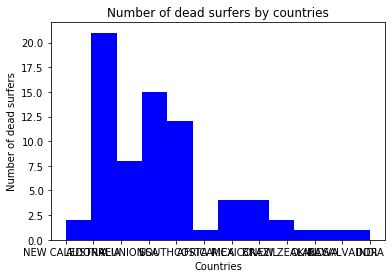

In [806]:
plt.xlabel('Countries')
plt.ylabel('Number of dead surfers')
plt.title('Number of dead surfers by countries')
plt.hist(list_countries, bins = 12, color = 'blue')